## Libraries

In [97]:
%load_ext autoreload
%autoreload 2

#general
import gym
import importlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#from baselines
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
#from stable_baselines3.common.env_checker import check_env
from stable_baselines3 import A2C

#local
from envs.rendezvous import Poliastro_env
from envs.env_test import play_game, play_game_train


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [104]:
env=Poliastro_env(render_mode="human",
                      r_1= [-6045, -5510, 2504],
                      v_1= [-3.357, 5.728, 2.133])

## non-train evironment

In [105]:
mean_no_trained,scores_no_trained=play_game(10, env)

Progress…:  20%|██████▌                          | 2/10 [01:16<05:05, 38.24s/it]


KeyboardInterrupt: 

In [ ]:
env.close()

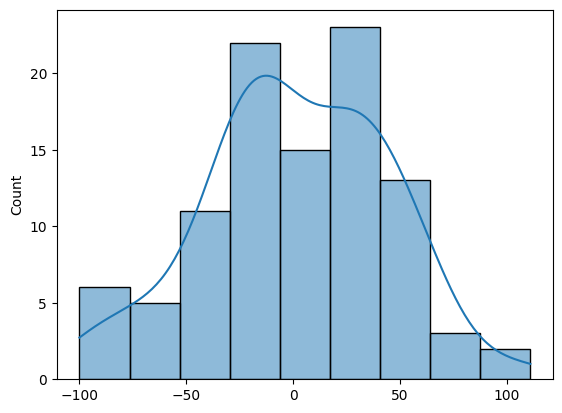

In [189]:
sns.histplot(scores_no_trained,kde=True);

# ML model

In [157]:
env=DummyVecEnv([lambda: env])

In [58]:
model=PPO("MultiInputPolicy", env, verbose=0)
model.learn(total_timesteps=40000)

In [62]:
env=Poliastro_env(render_mode="human")

/home/lucas/anaconda3/envs/rl/lib/python3.10/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float16
  logger.warn(


In [63]:
meanb, list_b=play_game_train(10, env, model)

Progress…: 100%|████████████████████████████████| 10/10 [00:26<00:00,  2.62s/it]


In [229]:
print(f"no trained mean:{mean_no_trained}, model PPO mean: {meanb}")

no trained mean:1.4, model PPO mean: 290.94


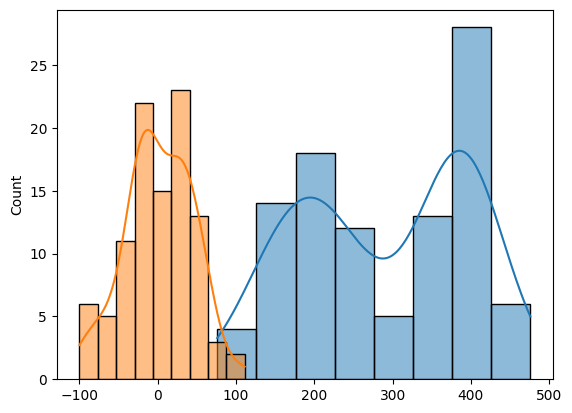

In [230]:
sns.histplot(list_b, kde=True);
sns.histplot(scores_no_trained,kde=True);

In [235]:
print(f"no trained mean:{mean_no_trained}, model PPO mean: {meanb}")#different initial position

no trained mean:1.4, model PPO mean: 16.09


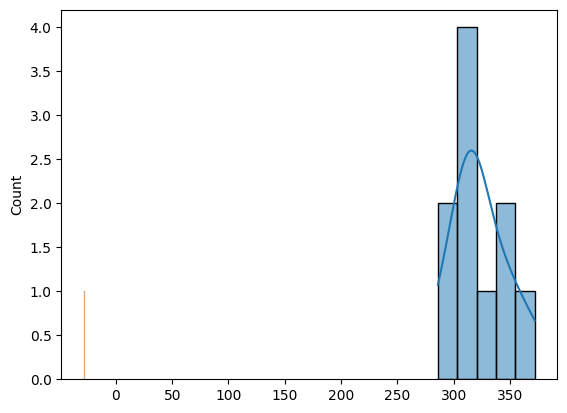

In [61]:
sns.histplot(list_b, kde=True);#different initial position
sns.histplot(scores_no_trained,kde=True);